In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../Data/heart.csv")

#### Df data was already preprocessed so I picked up one of the raw files with Hungary's data. First thing to do is specify there is no header, explicitly provide column names and delimiter


#### One major issue is with the delimiter in that , just separates first 3 columns

In [6]:
col_names = list(df.columns)

In [15]:
col_names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [35]:
df2 = pd.read_fwf("../Data/processed.hungarian.data",delimiter = ",",names = col_names,index_col = False)

In [36]:
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,"130,132,0,2,185,0,0,?,?,?,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29,1,2,"120,243,0,0,160,0,0,?,?,?,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29,1,2,"140,?,0,0,170,0,0,?,?,?,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30,0,1,"170,237,0,1,170,0,0,?,?,6,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31,0,2,"100,219,0,1,150,0,0,?,?,?,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,"160,331,0,0,94,1,2.5,?,?,?",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,54,0,3,"130,294,0,1,100,1,0,2,?,?,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,56,1,4,"155,342,1,0,150,1,3,2,?,?,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,58,0,2,"180,393,0,0,110,1,1,2,?,7,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The below workaround isn't ideal but I couldn't think of another way quicker

In [37]:
df2[['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']] = df2['trestbps'].str.split(",",expand = True)

#### Replace all question marks with NA

In [38]:
df2.replace("?",pd.NA,inplace=True)

#### Convert string values to numeric

In [39]:
df2 = df2.apply(pd.to_numeric)

#### Histogram of raw data

<ipython-input-40-fc8bcf61a366>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df2.hist(ax = ax)


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

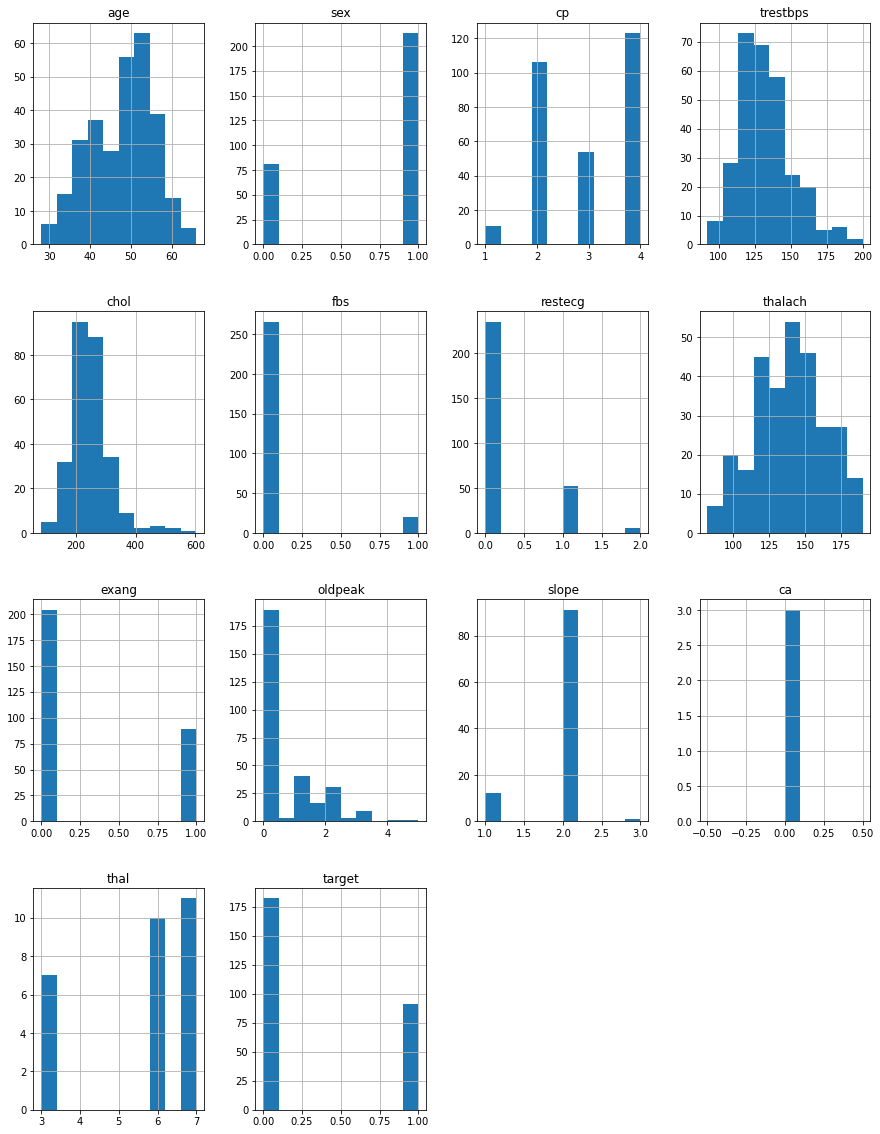

In [40]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df2.hist(ax = ax)

#### Histogram for cleaned and processed data from source

<ipython-input-44-2e3e538d1a22>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax2)


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

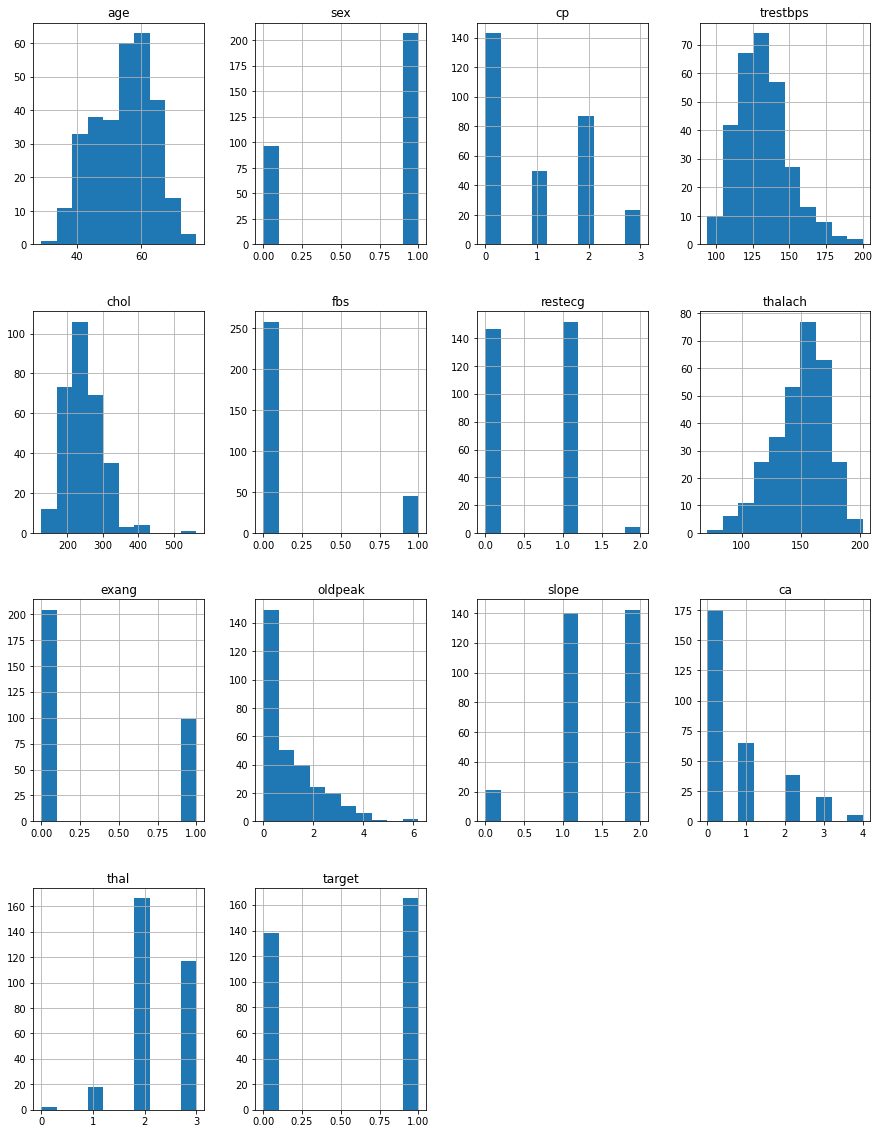

In [44]:
fig2 = plt.figure(figsize = (15,20))
ax2 = fig2.gca()
df.hist(ax = ax2)

#### Not the most insightful graph but creates scatterplots for every combination, to view it properly, click the jupyter hist logo on the figure. Have also saved it in data.

#### One insight is that there is -ve correlation between age and thalach(maximum heart rate achieved)

#### There happens to be +ve correlation between age and trestbps(resting blood pressure)

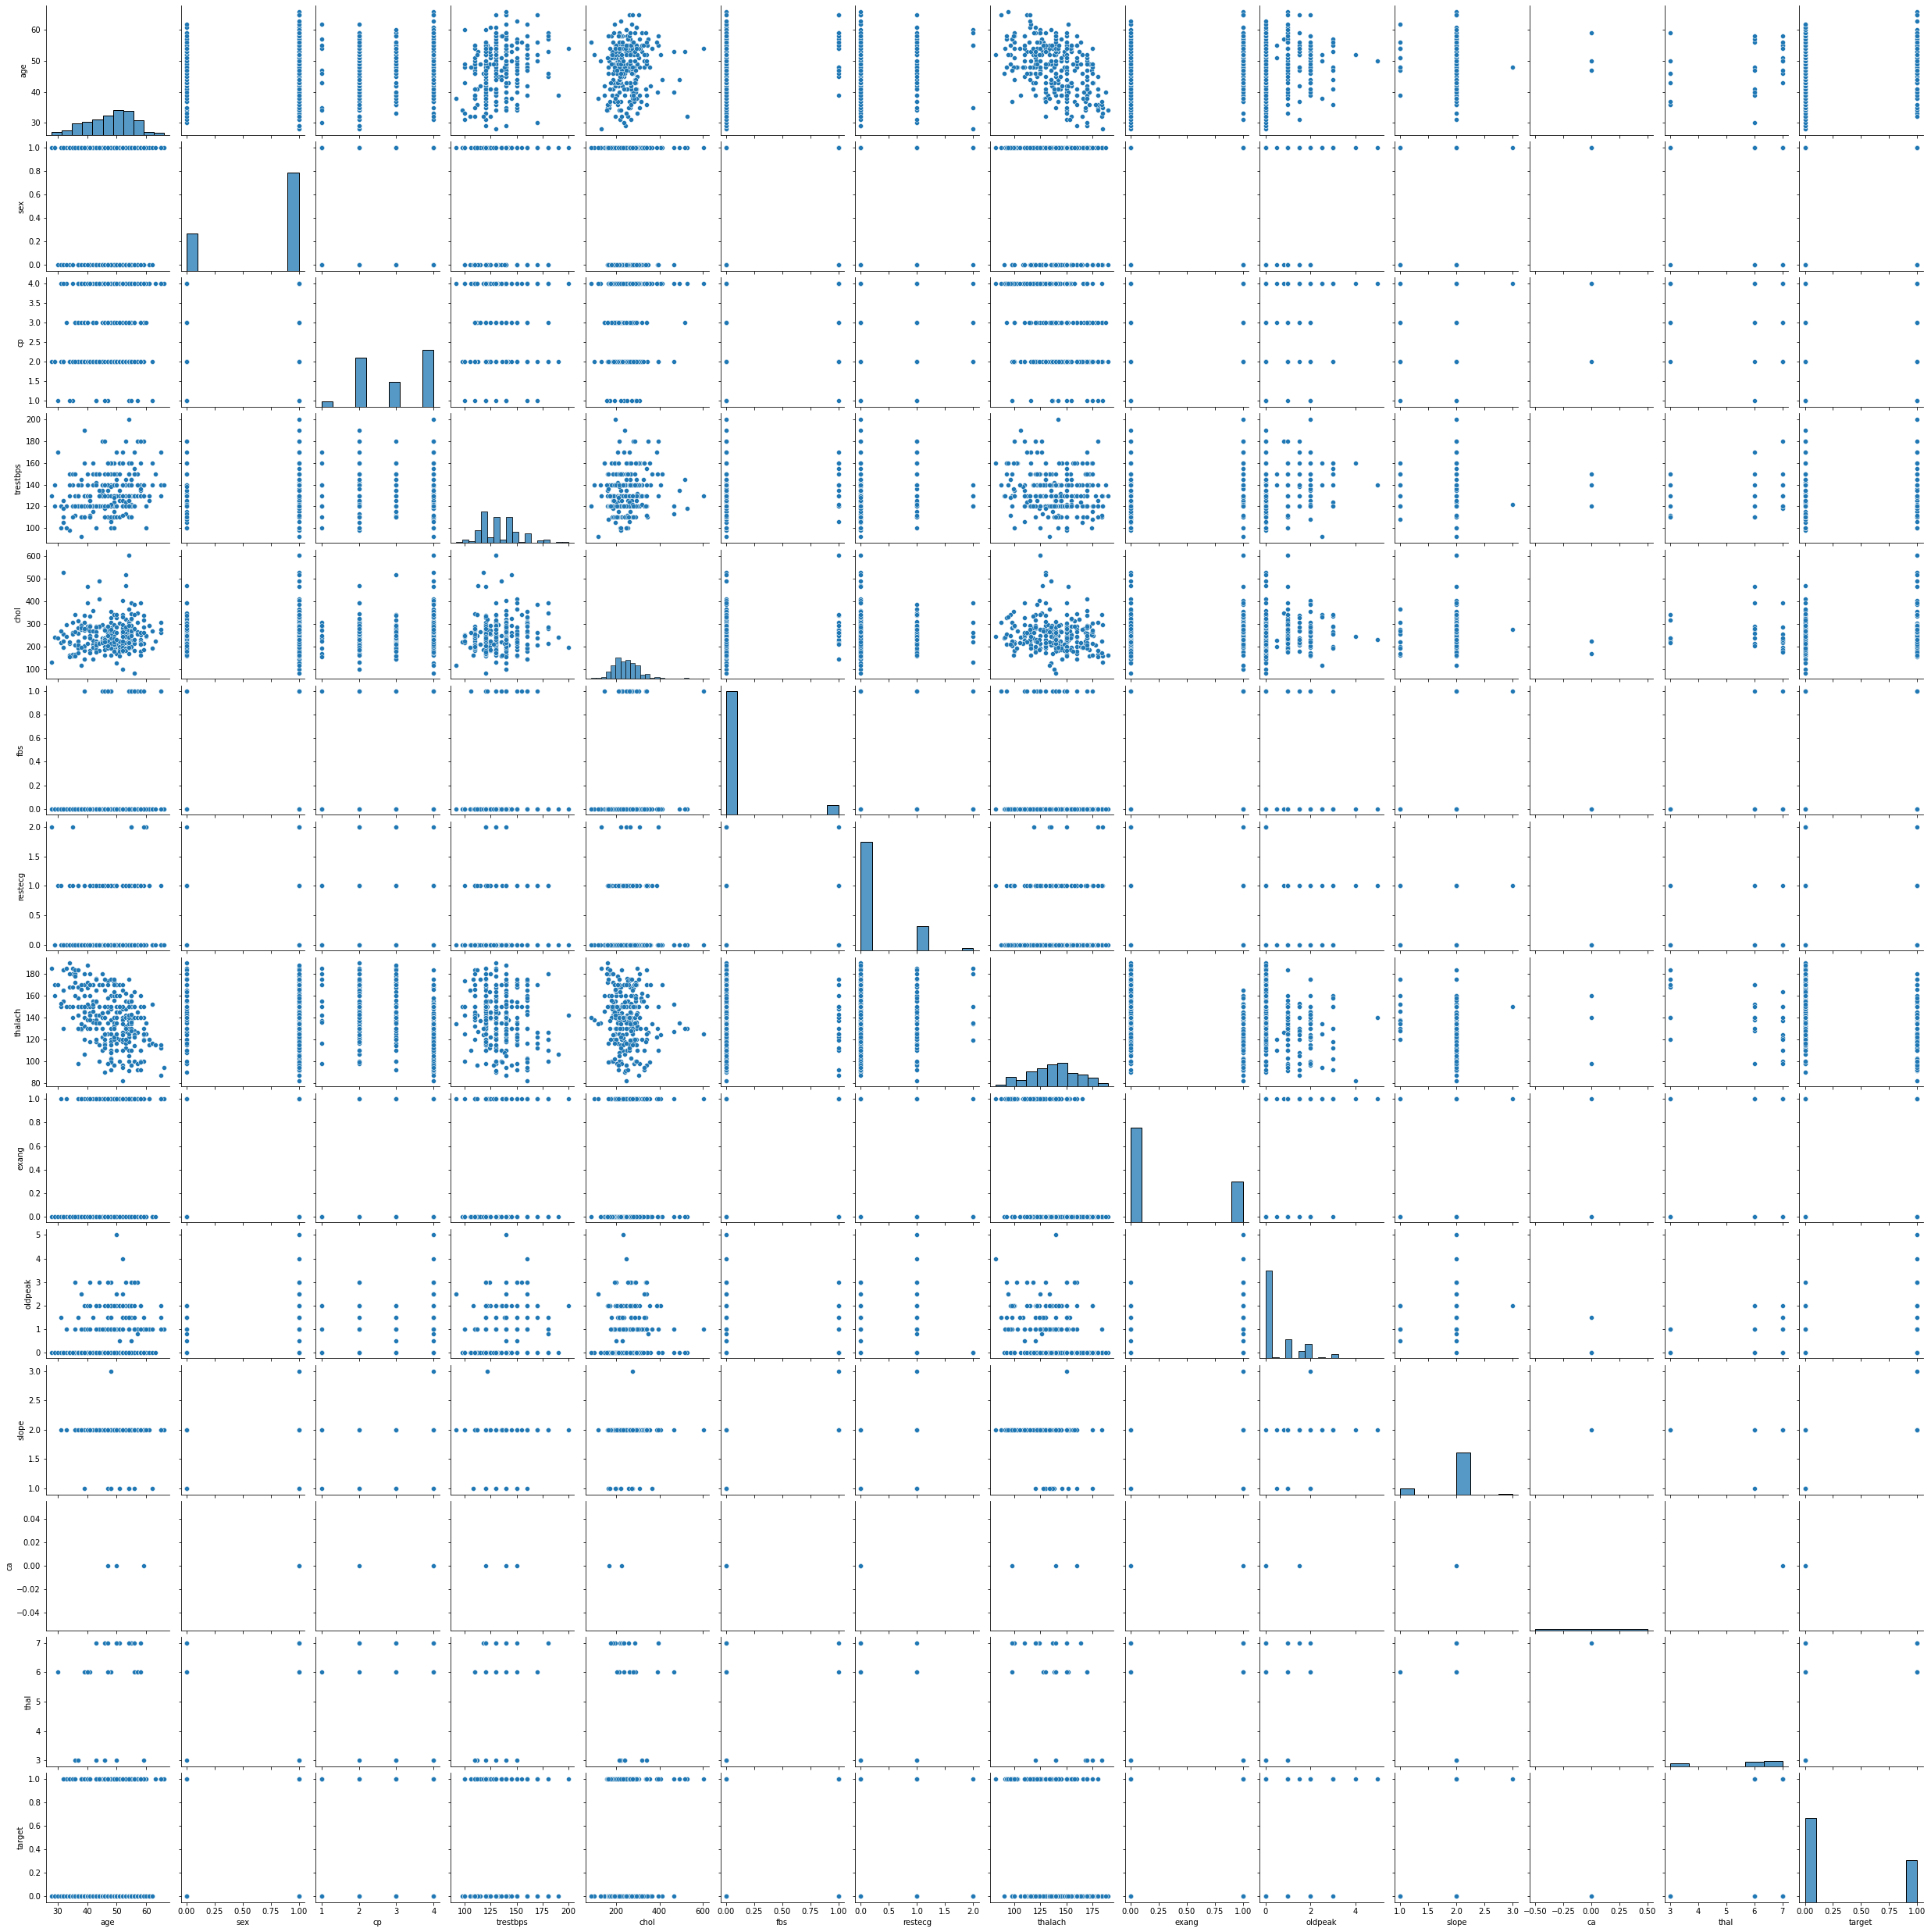

In [81]:
sns.pairplot(df2)

#### Creating a heatmap like last time

<AxesSubplot:>

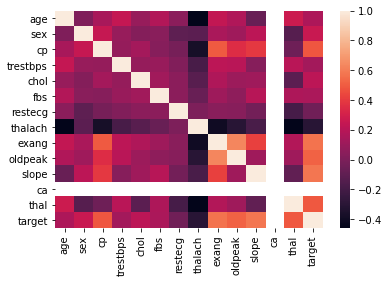

In [83]:
sns.heatmap(df2.corr())

#### thalach happens to be negatively correlated with age, cp(chest pain type), exang(exercise induced angina), thal(for defects) and target as well. exang, oldpeak and slope also have positive correlation to target. Similarly relationship between cp and exang, oldpeal and slope observable. ca is nan so is just white

#### Looking at fraction of NaN values in the raw data

In [57]:
for col in df2.columns:
    print("Column:",col,len(df2[df2[col].isna()])/len(df2))

Column: age 0.0
Column: sex 0.0
Column: cp 0.0
Column: trestbps 0.003401360544217687
Column: chol 0.0782312925170068
Column: fbs 0.027210884353741496
Column: restecg 0.003401360544217687
Column: thalach 0.003401360544217687
Column: exang 0.003401360544217687
Column: oldpeak 0.0
Column: slope 0.6462585034013606
Column: ca 0.9897959183673469
Column: thal 0.9047619047619048
Column: target 0.07142857142857142


#### Looking at fraction of Nan values in the processed data

In [59]:
for col in df.columns:
    print("Column:",col,len(df[df[col].isna()])/len(df))

Column: age 0.0
Column: sex 0.0
Column: cp 0.0
Column: trestbps 0.0
Column: chol 0.0
Column: fbs 0.0
Column: restecg 0.0
Column: thalach 0.0
Column: exang 0.0
Column: oldpeak 0.0
Column: slope 0.0
Column: ca 0.0
Column: thal 0.0
Column: target 0.0


#### Perhaps since I'm just looking at data from a single country, there happens to be a lot of values missing. I could simply just take the rows without nan values and end up with a dataset which can then be processed to scale data,etc.

#### Regarding MAR, MNAR AND MCAR this data set isn't too large to specifically say, but I guess where 90% or more data is missing that has to be MCAR. Will look at fields like trestbps and chol below

#### Just 1 value missing in trestbps

In [62]:
df2[df2['trestbps'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
90,48,0,2,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0.0


Where chol is missing, so is slope, ca and thal mostly missing. chol is serum cholesterol, slope is the slope of the peak exercise ST segment, ca is number of major vessels colored by fluoroscopy. Exercise induced angina also happens to be mostly zero meaning no. This could be due to incomplete testing and so possibly MCAR.

In [64]:
df2[df2['chol'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0.0
31,39,1,2,120.0,NaN,0.0,1.0,146.0,0.0,2.0,1.0,NaN,NaN,0.0
34,39,1,2,130.0,NaN,0.0,0.0,120.0,0.0,0.0,NaN,NaN,NaN,0.0
44,40,1,3,140.0,NaN,0.0,0.0,188.0,0.0,0.0,NaN,NaN,NaN,0.0
65,43,0,3,150.0,NaN,0.0,0.0,175.0,0.0,0.0,NaN,NaN,3.0,0.0
72,45,0,2,180.0,NaN,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0.0
75,45,1,3,135.0,NaN,0.0,0.0,110.0,0.0,0.0,NaN,NaN,NaN,0.0
86,47,0,3,130.0,NaN,0.0,0.0,145.0,0.0,2.0,2.0,NaN,NaN,0.0
91,48,0,2,120.0,NaN,1.0,1.0,148.0,0.0,0.0,NaN,NaN,NaN,0.0
97,48,1,2,100.0,NaN,0.0,0.0,100.0,0.0,0.0,NaN,NaN,NaN,0.0


#### However here we see that chol exists even if ca or thal are completely nan

In [65]:
df2[df2['ca'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0.0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0.0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0.0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0.0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,NaN
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1.0
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1.0
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1.0


In [66]:
df2[df2['thal'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0.0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0.0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0.0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0.0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52,1,4,140.0,266.0,0.0,0.0,134.0,1.0,2.0,2.0,NaN,NaN,1.0
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,NaN
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1.0
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1.0


#### Where slope is missing so is mostly ca making it possibly MAR?

In [72]:
df2[df2['slope'].isna()]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0.0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0.0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0.0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0.0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,59,1,4,130.0,NaN,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,1.0
276,59,1,4,140.0,264.0,1.0,2.0,119.0,1.0,0.0,NaN,NaN,NaN,1.0
281,44,1,4,135.0,491.0,0.0,0.0,135.0,0.0,0.0,NaN,NaN,NaN,1.0
284,49,1,4,128.0,212.0,0.0,0.0,96.0,1.0,0.0,NaN,NaN,NaN,1.0


In [70]:
df2[(df2['slope'].isna())&(df2['ca'].isna())]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0.0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0.0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0.0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0.0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,59,1,4,130.0,NaN,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,1.0
276,59,1,4,140.0,264.0,1.0,2.0,119.0,1.0,0.0,NaN,NaN,NaN,1.0
281,44,1,4,135.0,491.0,0.0,0.0,135.0,0.0,0.0,NaN,NaN,NaN,1.0
284,49,1,4,128.0,212.0,0.0,0.0,96.0,1.0,0.0,NaN,NaN,NaN,1.0


In [78]:
len(df2[(df2['slope'].isna())&(df2['chol'].isna())])

18

#### There seems to be some relationship between slope, ca, thal making it MAR though this is speculative at best

#### The processed file takes care of the values that are NaNs. I showed this earlier.

#### A brief description of the columns are:
* age is numeric in years presumably
* sex has been labelled 0 or 1
* cp is chest pain type -> 4 types -> 0,1,2,3 (checked by doing df_data['cp'].unique())
* trestbps is the resting blood pressure, it varies between 94 and 200 (checked by doing df_data['trestbps'].min() and df_data['trestbps'].max()) -> needs to be scaled
* chol is the serum cholestoral level in mg/dl -> needs to be scaled
* fbs represents fasting blood sugar thats greater than 120 mg/dl -> coded as 0 or 1
* restecg is the resting electrocardiographic results with classes 0,1 and 2
* thalach: The maximum heart rate achieved -> needs to be scaled
* exang: exercise induced angina -> The 2 classes are 0,1
* oldpeak: ST depression induced by exercise relative to rest -> needs to be scaled
* slope: the slope of the peak exercise ST segment -> 3 variables 0,1,2
* ca: number of major vessels colored by flourosopy -. labelled as 0,1,2,3,4 -> labelled as ordinal when it might not be so
* thal -> labelled as 0,1,2,3 -> labelled as ordinal when it might not be so
* target: target variable -> 1 is for heart disease and 0 for not having heart disease

#### Scaling trestbps,chol,thalach,oldpeak

In [10]:
norm_col = ['trestbps','chol','thalach','oldpeak']
for col in norm_col:
    df[col] = (df[col] - df[col].mean())/df[col].std()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,0.762694,-0.255910,1,0,0.015417,0,1.085542,0,0,1,1
1,37,1,2,-0.092585,0.072080,0,1,1.630774,0,2.119067,0,0,2,1
2,41,0,1,-0.092585,-0.815424,0,0,0.975900,0,0.310399,2,0,2,1
3,56,1,1,-0.662770,-0.198030,0,1,1.237849,0,-0.206364,2,0,2,1
4,57,0,0,-0.662770,2.078611,0,1,0.582975,1,-0.378618,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,0.477601,-0.101562,0,1,-1.163356,1,-0.723126,1,0,3,0
299,45,1,3,-1.232956,0.342190,0,1,-0.770432,0,0.138144,1,0,3,0
300,68,1,0,0.705675,-1.027653,1,1,-0.377507,0,2.032940,1,2,3,0
301,57,1,0,-0.092585,-2.223854,0,1,-1.512623,1,0.138144,1,1,3,0
